# Pattern Project

## Import Necessary Library

In [371]:
import pandas as pd
import numpy as np
import glob
import os
from os import listdir
from os.path import isfile, join
import csv
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Gaussian Naive bayes
from sklearn.naive_bayes import GaussianNB

#svm with rbf karnel
import sklearn
from sklearn import svm, preprocessing
#SVM
from sklearn import datasets,svm
from sklearn.cross_validation import train_test_split
from sklearn import metrics
#CN Matrix
from sklearn.metrics import accuracy_score, confusion_matrix

#Algo
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection

## Import DataSet

In [162]:
dataFrame0 = pd.read_csv("F:/python/4.2/project/main/dataset/DATASET_01.csv")
dataFrame1 = pd.read_csv("F:/python/4.2/project/main/dataset/DATASET_02.csv")
dataFrame2 = pd.read_csv("F:/python/4.2/project/main/dataset/DATASET_03.csv")
dataFrame3 = pd.read_csv("F:/python/4.2/project/main/dataset/DATASET_04.csv")
dataFrame4 = pd.read_csv("F:/python/4.2/project/main/dataset/DATASET_05.csv")
dataFrame5 = pd.read_csv("F:/python/4.2/project/main/dataset/DATASET_06.csv")

dataFrame0.head()
#dataFrame1.head()
#dataFrame2.head()
#dataFrame3.head()
#dataFrame4.head()
#dataFrame5.head()

,Unnamed: 0,Current Place,Unnamed: 2,Unnamed: 3,Place of interest,Unnamed: 5,Unnamed: 6,Food you like most,Leisure time activity,Future plan,Typically your days are started at:
0,NaN,Place Name,Latitude,Longitude,Place Name,Latitude,Longitude,NaN,NaN,NaN,NaN
1,151340976.0,Goran,23.75027,90.43413,Cox's Bazar,21.41127,91.995891,Biriyani,Movies,Software Engineer,LR
2,151340977.0,Banasree,22.513531,88.301537,Sea Beach,NaN,NaN,Kachchi,Sports,BCS/Business,LR
3,151340978.0,Azimpur,23.7270399,90.3846895,Kaptai Lake,22.755208,92.277031,kacchi biryani,Series,Higher Study in North America,ER
4,151340980.0,Niketon,23.70731,90.41548,home,23.70731,90.41548,any,"movies,music",software Engineer,LR


## Dataset Concatenate

In [165]:
#path = "F:/python/4.2/project/main/dataset/"
#filenames = [path+'DATASET_01.csv', 'dataset/DATASET_02.csv', 'dataset/DATASET_03.csv', 'dataset/DATASET_04.csv',
 #           'dataset/DATASET_05.csv', 'dataset/DATASET_06.csv']

#dataFrames = []
#for f in filenames:
#    dataFrames.append(pd.read_csv(f))
#outputFile = "dataset/finalData/finalData.csv"
#data_dir= glob.glob(os.path.join(path, '*.csv'))
#print(os.listdir(data_dir))

In [62]:
#filenames = glob('dataset/DATASET*.csv')
#dataFrames = [pd.read_csv(f) for f in filenames]

In [201]:
def concatenate (indir = "F:/python/4.2/project/main/dataset/", outfile = "F:/python/4.2/project/main/dataset/Total/TotalfinalData.csv"):
    #os.chdir(indir)
    #fileList = glob.glob(indir+"*.csv")
    fileList = [f for f in listdir(indir) if isfile(join(indir, f))]
    dfList = []
    #colnames=["ID"]
    for filename in fileList:
        print(filename)
        df = pd.read_csv(filename, header= None)
        dfList.append(df)
    concateDf= pd.concat(dfList, axis=0)
    concateDf.to_csv(outfile, index = None)
concatenate()

DATASET_01.csv
DATASET_02.csv
DATASET_03.csv
DATASET_04.csv
DATASET_05.csv
DATASET_06.csv


### Column Add from other Dataset

In [212]:
# Loading data and preprocessing
filePath1 = "F:/python/4.2/project/main/dataset/Total/TotalfinalData_1.csv"
filePath2 = "F:/python/4.2/project/main/extra/EXTENDED_1.csv"
mergedFile = "F:/python/4.2/project/main/dataset/Total/TotalfinalData_3.csv"

df1 = pd.read_csv(filePath1)
df2 = pd.read_csv(filePath2)
columnsNeed = ["ID", "AcademicResult", "Co_curri", "Skill","Achi","Physical","Higher"]
for column in df2.columns:
    dropChecker = True
    for colName in columnsNeed:
        if column == colName:
            dropChecker = False
            break

    if dropChecker == True:
        df2.drop(column, axis=1, inplace=True)

merged = df1.merge(df2, on="ID")
# for column in df1
merged.to_csv(mergedFile, index=False)

data_frame = pd.read_csv("F:/python/4.2/project/main/dataset/Total/TotalfinalData_final.csv", usecols=[1,2,3,8,9,11,12,13,14])

## Dataset Processed

In [206]:
cols = ["ID", "Name", "OLat", "OLong","PI", "PILat", "PIlong", "Food", "Leisure", "FP","LR","AcademicResult", "Co_curri", "Skill", "Achi", "Physical", "Higher"]
df = pd.read_csv("F:/python/4.2/project/main/dataset/Total/TotalfinalData_final.csv",)
df.columns = [''] * len(df.columns)
df = df[1:]
df.reset_index(drop=True)
df.columns = cols

df.drop(['Name'], axis = 1, inplace = True)
df.drop(['ID'], axis = 1, inplace = True)
df.head()

,OLat,OLong,PI,PILat,PIlong,Food,Leisure,FP,LR,AcademicResult,Co_curri,Skill,Achi,Physical,Higher
1,23.75027,90.43413,Cox's Bazar,21.41127,91.995891,Biriyani,Movies,Software Engineer,LR,3.13,None,None,1.0,Yes,No
2,22.513531,88.301537,Cox's Bazar,20.9232,92.2676,Biriyani,Sports,BCS/Business,LR,2.71,None,Web Development,5.0,Yes,Yes
3,23.7270399,90.3846895,Kaptai Lake,22.755208,92.277031,Biriyani,Series,Higher Study in North America,ER,3.59,Club committee,None,2.0,Yes,No
4,23.70731,90.41548,home,23.70731,90.41548,any,"Movies, Music",Software Engineer,LR,2.92,None,None,1.0,Yes,No
5,22.301411,70.822357,home,22.301411,70.822357,Sea food,Music,Businessman,LR,2.53,None,Java,3.0,No,Yes


## Label the Dataset 

In [238]:
df.dropna(axis = 0, inplace = True)
lb_make = LabelEncoder()
df["PI"] = lb_make.fit_transform(df["PI"])
df["Food"] = lb_make.fit_transform(df["Food"])
df["Leisure"] = lb_make.fit_transform(df["Leisure"])
df["FP"] = lb_make.fit_transform(df["FP"])
df["LR"] = lb_make.fit_transform(df["LR"])
df["Co_curri"] = lb_make.fit_transform(df["Co_curri"])
df["Skill"] = lb_make.fit_transform(df["Skill"])
df["Physical"] = lb_make.fit_transform(df["Physical"])
df["Higher"] = lb_make.fit_transform(df["Higher"])
df.head()

,OLat,OLong,PI,PILat,PIlong,Food,Leisure,FP,LR,AcademicResult,Co_curri,Skill,Achi,Physical,Higher
29,23.828959,90.375672,33,48.856613,2.352222,44,4,35,1,3.41,1,2,3.0,1,1
105,23.7325976,90.4025838,45,40.463669,-3.74922,38,42,31,1,3.36,1,0,3.0,1,1
108,23.738078,90.372485,9,21.43392,91.98703,47,39,14,1,3.07,1,0,1.0,0,0
43,20.53829,86.30937,1,21.8311,92.368629,20,20,27,1,2.89,1,1,2.0,0,0
57,20.53829,86.30937,36,20.6237016,92.3233948,9,45,33,1,3.07,1,4,2.0,0,0


## Classifier - Problem 1

In [239]:
df = sklearn.utils.shuffle(df)
x = df.drop("Higher",axis = 1).values
y = df["Higher"].values

### Decision Tree - Accuracy Test

In [253]:
test_size = int(0.2*len(x))
train_x = x[:-test_size]
train_y = y[:-test_size]
test_x = x[-test_size:]
test_y = y[-test_size:]

clf = DecisionTreeClassifier()
clf.fit(train_x, train_y)
clf.score(test_x, test_y)

#print(clf.predict([train_x[7]]))

0.46153846153846156

### Test single Data - Decision Tree

In [225]:
print(clf.predict([train_x[6]]))
#1-Yes, 0 -No

[1]


### Gaussian Naive Bayes - Accuracy Test

In [231]:
#Gaussian Naive bayes
clf = GaussianNB()
clf.fit(train_x, train_y)
clf.score(test_x, test_y)

0.65384615384615385

### Bernouli Naive Bayes

In [332]:
from sklearn.naive_bayes import BernoulliNB
model1=BernoulliNB()
model1.fit(X_train,y_train)
predict1=model1.predict(X_test)
x=y_test.iloc[:].values

length1=len(predict1)
correct1=0
for i in range(length1):
    if(x[i]==predict1[i]):
        correct1=correct1+1
print(correct1)

accuracy1=correct1*100/len(x)
print(accuracy1)

9
56.25


[[0 7 0]
 [0 9 0]
 [0 0 0]]


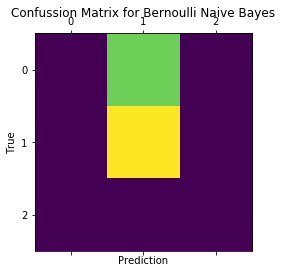

In [333]:
print(metrics.confusion_matrix(y_test,predict1,labels=[0,1,2]))
cm=metrics.confusion_matrix(y_test,predict1,labels=[0,1,2])
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confussion Matrix for Bernoulli Naive Bayes')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

### svm with rbf kernel

In [261]:
#svm with rbf karnel
df = sklearn.utils.shuffle(df)
x = df.drop("Higher",axis = 1).values
y = df["Higher"].values

x = preprocessing.scale(x)
test_size = int(0.2*len(x))
train_x = x[:-test_size]
train_y = y[:-test_size]
test_x = x[-test_size:]
test_y = y[-test_size:]

clf = svm.SVR(kernel = "rbf")
clf.fit(train_x, train_y)
abs(clf.score(test_x, test_y))

C:\Users\nasim\Anaconda3\envs\workshop\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


0.40339571140762054

### SVM

In [325]:
X=df.drop('Higher',axis=1)
y=df['Higher']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.12)

model=svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [330]:
predict=model.predict(X_test)
x=y_test.iloc[:].values
length=len(predict)

correct=0
for i in range(length):
    if(predict[i]==x[i]):
        correct+=1
print(correct)

accuracy=correct*100/len(x)
print(accuracy)

9
56.25


[[2 5 0]
 [2 7 0]
 [0 0 0]]


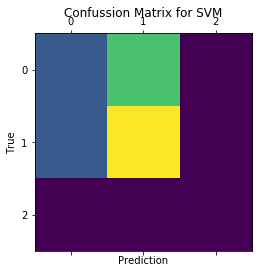

In [331]:
#print("{0}".format(metrics.confusion_matrix(y_test,predict,labels=[0,1,2])))
print(metrics.confusion_matrix(y_test,predict,labels=[0,1,2]))
cm=metrics.confusion_matrix(y_test,predict,labels=[0,1,2])
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confussion Matrix for SVM')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show() 

### Random Forest Classifier

In [356]:
model=RandomForestClassifier()
mode2=DecisionTreeRegressor()

model.fit(X_train,y_train)
mode2.fit(X_train,y_train)

predict3=model3.predict(X_test)
predict4=model4.predict(X_test)

length3=len(predict3)
correct3=0
for i in range(length3):
    if(x[i]==predict3[i]):
        correct3=correct3+1
print(correct3)
accuracy3=correct3*100/len(x)
print(accuracy3)


9
56.25


[[0 7 0]
 [2 7 0]
 [0 0 0]]


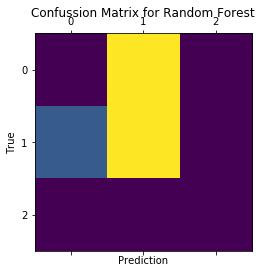

In [335]:
print(metrics.confusion_matrix(y_test,predict3,labels=[0,1,2]))
cm=metrics.confusion_matrix(y_test,predict3,labels=[0,1,2])
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confussion Matrix for Random Forest')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

### Box Plot for Algorithm Comparison

In [345]:
models = []
models.append(('DT', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GB', GaussianNB()))
models.append(('NB', BernoulliNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))

seed = 7
results = []
names = []
X = X_train
Y = y_train

for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean()*100)
    print(msg)

DT: 56.363636 
KNN: 51.969697 
GB: 51.363636 
NB: 59.772727 
SVC: 62.348485 
LSVC: 54.469697 
RFC: 58.636364 


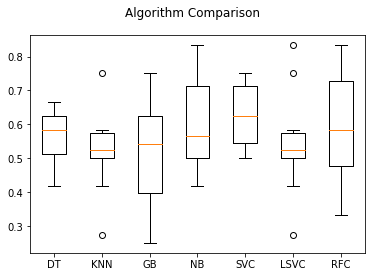

In [346]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Classifier - Problem 2

In [263]:
df = sklearn.utils.shuffle(df)
x = df.drop("Physical",axis = 1).values
y = df["Physical"].values

In [283]:
#Decision Tree
test_size = int(0.2*len(x))
train_x = x[:-test_size]
train_y = y[:-test_size]
test_x = x[-test_size:]
test_y = y[-test_size:]

clf = DecisionTreeClassifier()
clf.fit(train_x, train_y)
#clf.score(test_x, test_y)
print('Accuracy:', clf.score(test_x, test_y))

#print(clf.predict([train_x[7]]))

Accuracy: 0.384615384615


In [295]:
#Gaussian Naive bayes
clf = GaussianNB()
clf.fit(train_x, train_y)
#clf.score(test_x, test_y)
print('Accuracy:', clf.score(test_x, test_y))

Accuracy: 0.461538461538


In [297]:
#svm with rbf karnel
df = sklearn.utils.shuffle(df)
x = df.drop("Higher",axis = 1).values
y = df["Higher"].values

x = preprocessing.scale(x)
test_size = int(0.2*len(x))
train_x = x[:-test_size]
train_y = y[:-test_size]
test_x = x[-test_size:]
test_y = y[-test_size:]

clf = svm.SVR(kernel = "rbf")
clf.fit(train_x, train_y)
#abs(clf.score(test_x, test_y))
print('Accuracy:', abs(clf.score(test_x, test_y)))

Accuracy: 0.588040596803


C:\Users\nasim\Anaconda3\envs\workshop\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


### SVM

In [363]:
X=df.drop('LR',axis=1)
y=df['LR']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.12)

model=svm.SVC(kernel='linear')
model.fit(X_train,y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [364]:
predict=model.predict(X_test)
x=y_test.iloc[:].values
length=len(predict)

correct=0
for i in range(length):
    if(predict[i]==x[i]):
        correct+=1
print(correct)

accuracy=correct*100/len(x)
print(accuracy)

13
81.25


[[ 0  3  0]
 [ 0 13  0]
 [ 0  0  0]]


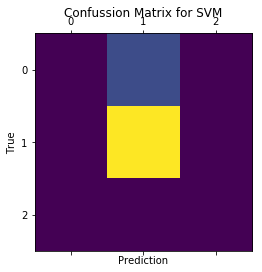

In [366]:
#print("{0}".format(metrics.confusion_matrix(y_test,predict,labels=[0,1,2])))
print(metrics.confusion_matrix(y_test,predict,labels=[0,1,2]))
cm=metrics.confusion_matrix(y_test,predict,labels=[0,1,2])
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confussion Matrix for SVM')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show() 

### Random Forest Classifier 

In [367]:
model=RandomForestClassifier()
mode2=DecisionTreeRegressor()

model.fit(X_train,y_train)
mode2.fit(X_train,y_train)

predict3=model3.predict(X_test)
predict4=model4.predict(X_test)

length3=len(predict3)
correct3=0
for i in range(length3):
    if(x[i]==predict3[i]):
        correct3=correct3+1
print(correct3)
accuracy3=correct3*100/len(x)
print(accuracy3)

8
50.0


[[0 3 0]
 [5 8 0]
 [0 0 0]]


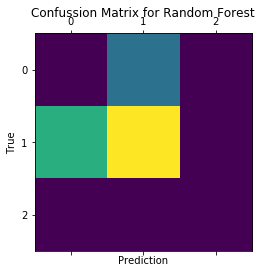

In [368]:
print(metrics.confusion_matrix(y_test,predict3,labels=[0,1,2]))
cm=metrics.confusion_matrix(y_test,predict3,labels=[0,1,2])
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confussion Matrix for Random Forest')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

### Boxplot for algorithm comparison 

In [369]:
models = []
models.append(('DT', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GB', GaussianNB()))
models.append(('NB', BernoulliNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))

seed = 7
results = []
names = []
X = X_train
Y = y_train

for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean()*100)
    print(msg)

DT: 73.712121 
KNN: 70.227273 
GB: 62.727273 
NB: 75.227273 
SVC: 77.727273 
LSVC: 68.636364 
RFC: 69.242424 


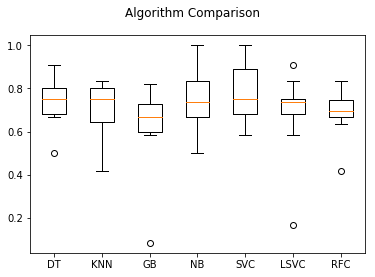

In [370]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Error Rate Calculation

In [351]:
#error rate = (1 - (test_y / train_y)) * 100